<a href="https://colab.research.google.com/github/aloka-dias/data-mining-assignment-2/blob/main/data_mining_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining Assignment 2: Prediction of Protein Expression



In [1]:
import multiprocessing

multiprocessing.cpu_count()

8

## Q1) Data Analysis

In [2]:
# @title
!wget https://warwick.ac.uk/fac/sci/dcs/teaching/material/cs909/patches_256.zip
!unzip /content/patches_256.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/patches_256/C1_36x70.png  
  inflating: /content/patches_256/C1_36x72.png  
  inflating: /content/patches_256/C1_36x74.png  
  inflating: /content/patches_256/C1_36x76.png  
  inflating: /content/patches_256/C1_36x78.png  
  inflating: /content/patches_256/C1_36x80.png  
  inflating: /content/patches_256/C1_36x82.png  
  inflating: /content/patches_256/C1_36x84.png  
  inflating: /content/patches_256/C1_36x86.png  
  inflating: /content/patches_256/C1_36x88.png  
  inflating: /content/patches_256/C1_36x90.png  
  inflating: /content/patches_256/C1_36x92.png  
  inflating: /content/patches_256/C1_36x94.png  
  inflating: /content/patches_256/C1_36x96.png  
  inflating: /content/patches_256/C1_36x98.png  
  inflating: /content/patches_256/C1_37x101.png  
  inflating: /content/patches_256/C1_37x103.png  
  inflating: /content/patches_256/C1_37x105.png  
  inflating: /content/patches_256/C1_37x107.png  
  inflating: /

In [3]:
import pandas as pd
df = pd.read_csv('https://warwick.ac.uk/fac/sci/dcs/teaching/material/cs909/protein_expression_data.csv')


df['specimen_id']=df.VisSpot.apply(lambda x: x.split('-')[2]) #create specimen id field
df['image_id']=df.VisSpot.apply(lambda x: x.split('-')[2])+'_'+df.id #create image id field
df = df.set_index('image_id').sort_index()
protein_names = ['SMAa', 'CD11b',
       'CD44', 'CD31', 'CDK4', 'YKL40', 'CD11c', 'HIF1a', 'CD24', 'TMEM119',
       'OLIG2', 'GFAP', 'VISTA', 'IBA1', 'CD206', 'PTEN', 'NESTIN', 'TCIRG1',
       'CD74', 'MET', 'P2RY12', 'CD163', 'S100B', 'cMYC', 'pERK', 'EGFR',
       'SOX2', 'HLADR', 'PDGFRa', 'MCT4', 'DNA1', 'DNA3', 'MHCI', 'CD68',
       'CD14', 'KI67', 'CD16', 'SOX10']
print(df)

          Unnamed: 0                VisSpot  Location_Center_Y  \
image_id                                                         
A1_0x40          412  AAGTAAGCTTCCAAAC-1-A1         764.003658   
A1_0x42         7325  GTTTGAGCGGTTATGT-1-A1         799.511111   
A1_0x44         8102  TCACTCAGCGCATTAG-1-A1         832.902467   
A1_0x46         7085  GTGCGCTTACAAATGA-1-A1         858.343544   
A1_0x48         3748  CGAAGACTGCCCGGGA-1-A1         892.179831   
...              ...                    ...                ...   
D1_9x63         3609  CCTCCCGACAATCCCT-1-D1         123.760525   
D1_9x65          172  AACACGACTGTACTGA-1-D1          29.281573   
D1_9x67         2686  CACCGCCGACCAGCGA-1-D1         938.403662   
D1_9x69         2813  CAGAGTGATTTAACGT-1-D1         844.093656   
D1_9x71         6877  GTCAGTTGTGCTCGTT-1-D1         740.107483   

          Location_Center_X      SMAa     CD11b      CD44      CD31      CDK4  \
image_id                                                    

In [4]:
df_training = df[df['specimen_id'] != 'A1']
df_test = df[df['specimen_id'] == 'A1']

print(df_test['specimen_id'].value_counts())

specimen_id
A1    2894
Name: count, dtype: int64


In [5]:
print('i) The number of examples in each specimen are given by:')
print(df_training['specimen_id'].value_counts())

i) The number of examples in each specimen are given by:
specimen_id
C1    4129
D1    1753
B1    1145
Name: count, dtype: int64


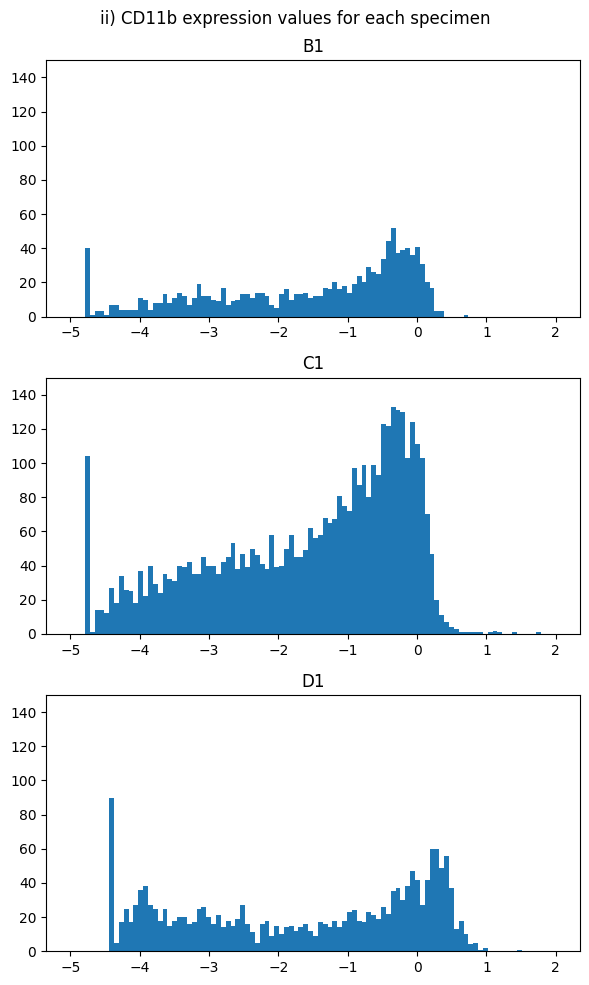

In [6]:
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(6, 10))

for ax, specimen in zip([ax0, ax1, ax2], ['B1', 'C1', 'D1']):
  ax.hist(df_training[df_training['specimen_id'] == specimen]['CD11b'], bins=100, range=(-5, 2))
  ax.set_title(specimen)
  ax.set_ylim([0,150])

plt.suptitle('ii) CD11b expression values for each specimen')
fig.tight_layout()
plt.show()

The three histograms generally follow the same shape.

iii)


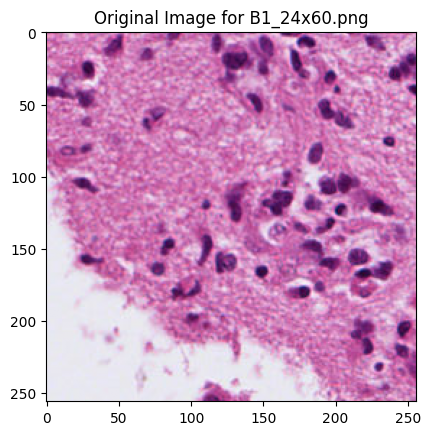

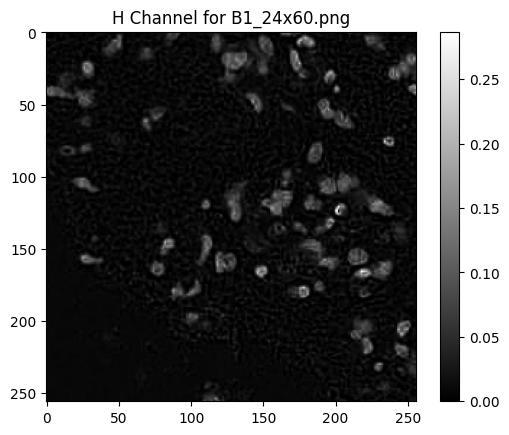

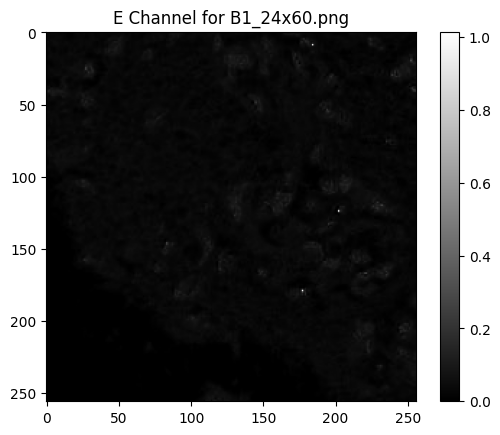

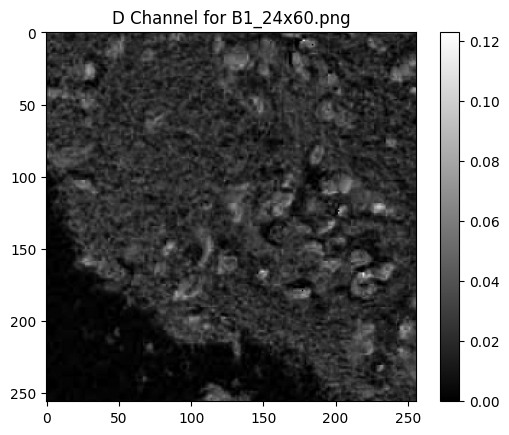

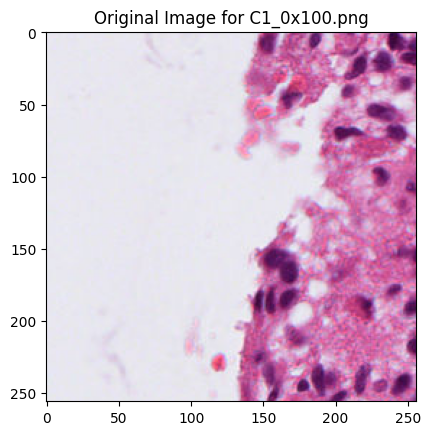

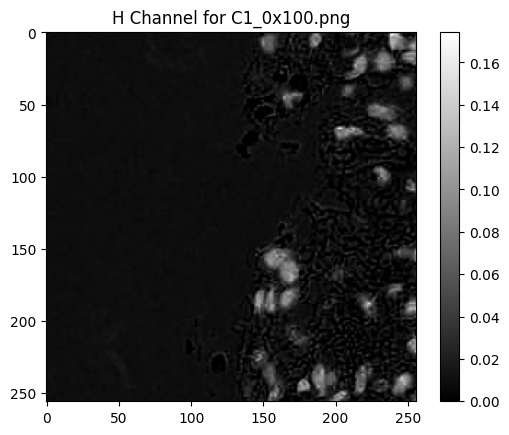

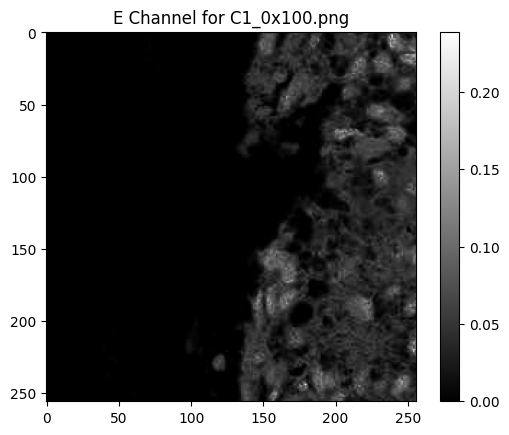

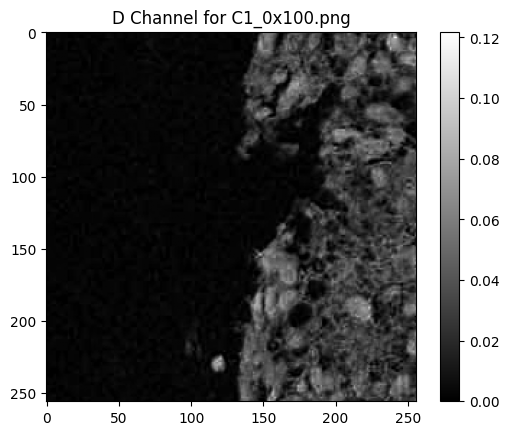

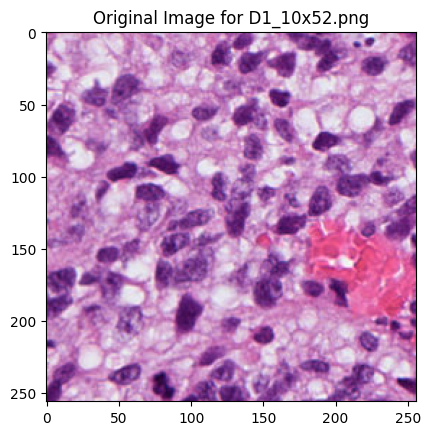

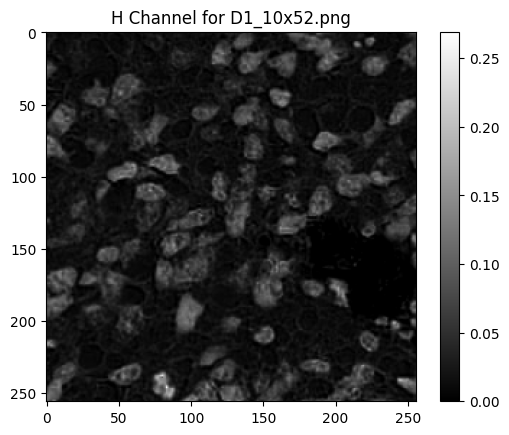

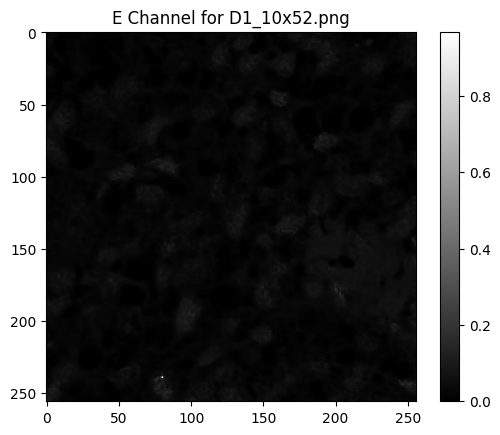

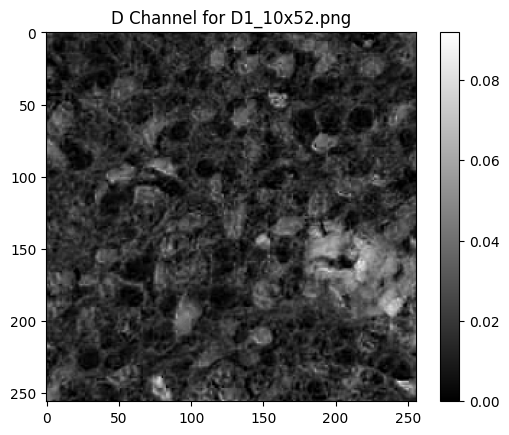

In [7]:
image_folder = '/content/patches_256/'
from skimage.color import rgb2hed
import skimage
from skimage.io import imread
from skimage.color import rgba2rgb


# Replace 'path_to_image' with the path to the image you want to display

print('iii)')

for image_name, rgba in zip(['B1_24x60.png', 'C1_0x100.png', 'D1_10x52.png'], [1, 0, 0]):
  image_path = image_folder+image_name
  if rgba:
    I = rgba2rgb(imread(image_path)) #read sample RGBA image and convert to RGB
    I_hed =  rgb2hed(I) #convert to HED
  else:
    I = imread(image_path)
    I_hed =  rgb2hed(I) #read sample RGB image and convert to HED

  plt.imshow(I);plt.title('Original Image for ' + image_name);plt.show()
  I_h = I_hed[:,:,0]; plt.figure(); plt.imshow(I_h,cmap='gray');plt.colorbar();plt.title('H Channel for ' + image_name);plt.show()
  I_e = I_hed[:,:,1]; plt.figure();  plt.imshow(I_e,cmap='gray');plt.colorbar();plt.title('E Channel for ' + image_name);plt.show()
  I_d = I_hed[:,:,2]; plt.figure();  plt.imshow(I_d,cmap='gray');plt.colorbar();plt.title('D Channel for ' + image_name);plt.show()



In [8]:
import numpy as np

average_intensity_H_and_CD11b = np.empty((df_training.shape[0], 2))

for i in range(df_training.shape[0]):
  image_path = image_folder + df_training.iloc[i, :].name + '.png'

  if df_training.iloc[i, :]['specimen_id'] == 'B1':
    I = rgba2rgb(imread(image_path)) #read sample RGBA image and convert to RGB
    I_hed =  rgb2hed(I) #convert to HED
  else:
    I = imread(image_path)
    I_hed =  rgb2hed(I) #read sample RGB image and convert to HED

  average_intensity_H_and_CD11b[i, 0] = np.mean(I_hed[:,:,0])
  average_intensity_H_and_CD11b[i, 1] = df_training.iloc[i, :]['CD11b']


print(average_intensity_H_and_CD11b)

[[ 0.01747276 -4.13649755]
 [ 0.01437381 -4.73160113]
 [ 0.01002619 -4.73160113]
 ...
 [ 0.03151054 -2.49875064]
 [ 0.02958589 -0.4934746 ]
 [ 0.02806112 -0.35420293]]


iv) the correlation coeff is -0.0735


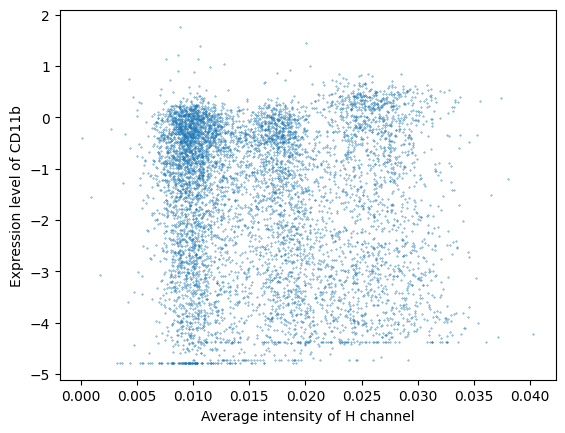

In [9]:
from scipy import stats
correlation, _ = stats.pearsonr(average_intensity_H_and_CD11b[:, 0], average_intensity_H_and_CD11b[:, 1])
print('iv) the correlation coeff is', round(correlation, 4))

plt.scatter(average_intensity_H_and_CD11b[:, 0], average_intensity_H_and_CD11b[:, 1], s=0.1)

plt.ylabel('Expression level of CD11b')
plt.xlabel('Average intensity of H channel')

plt.show()

Whilst the data is not linearly correlated, we do see groups forming in our scatter plot so the average intensity of H channel could be useful for predicting expression levels of CD11b.

In [10]:
average_intensity_blue_and_CD11b = np.empty((df_training.shape[0], 2))

for i in range(df_training.shape[0]):
  image_path = image_folder + df_training.iloc[i, :].name + '.png'

  if df_training.iloc[i, :]['specimen_id'] == 'B1':
    I = rgba2rgb(imread(image_path)) #read sample RGBA image and convert to RGB
  else:
    I = imread(image_path)

  average_intensity_blue_and_CD11b[i, 0] = np.mean(I[:,:,2])
  average_intensity_blue_and_CD11b[i, 1] = df_training.iloc[i, :]['CD11b']


print(average_intensity_blue_and_CD11b)

[[  0.73165175  -4.13649755]
 [  0.78953038  -4.73160113]
 [  0.93629761  -4.73160113]
 ...
 [184.96592712  -2.49875064]
 [187.83944702  -0.4934746 ]
 [189.98802185  -0.35420293]]


iv) the correlation coeff is -0.0568


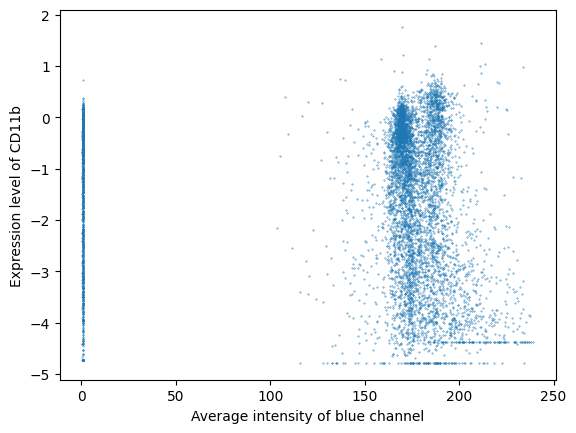

In [11]:
correlation_blue_cd11b, _ = stats.pearsonr(average_intensity_blue_and_CD11b[:, 0], average_intensity_blue_and_CD11b[:, 1])
print('iv) the correlation coeff is', round(correlation_blue_cd11b, 4))

plt.scatter(average_intensity_blue_and_CD11b[:, 0], average_intensity_blue_and_CD11b[:, 1], s=0.1)

plt.ylabel('Expression level of CD11b')
plt.xlabel('Average intensity of blue channel')

plt.show()

Whilst the data is not linearly correlated, we do see groups forming in our scatter plot so the average intensity of blue channel could be useful for predicting expression levels of CD11b.

v) the correlation coeff is -0.1031


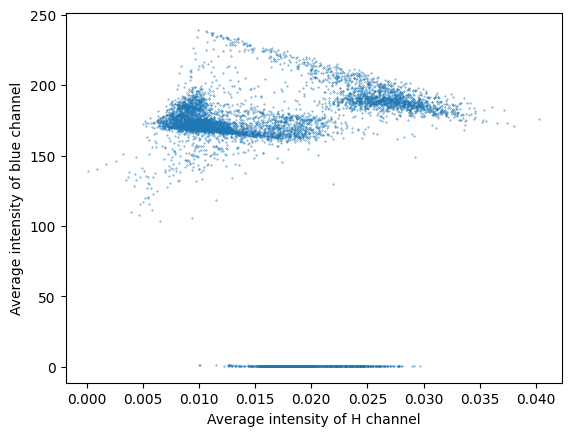

In [12]:
average_H_and_average_blue = np.column_stack((average_intensity_H_and_CD11b[:, 0], average_intensity_blue_and_CD11b[:, 0]))

correlation_H_blue , _ = stats.pearsonr(average_H_and_average_blue[:, 0], average_H_and_average_blue[:, 1])
print('v) the correlation coeff is', round(correlation_H_blue, 4))

plt.scatter(average_H_and_average_blue[:, 0], average_H_and_average_blue[:, 1], s=0.1)

plt.ylabel('Average intensity of blue channel')
plt.xlabel('Average intensity of H channel')

plt.show()

Whilst the data is not linearly correlated, we do see groups forming in our scatter plot so H channel and blue channel average intensities aren't independent. We could therefore use some kind of dimensionality reduction to reduce our data without losing too much variance.

<Axes: >

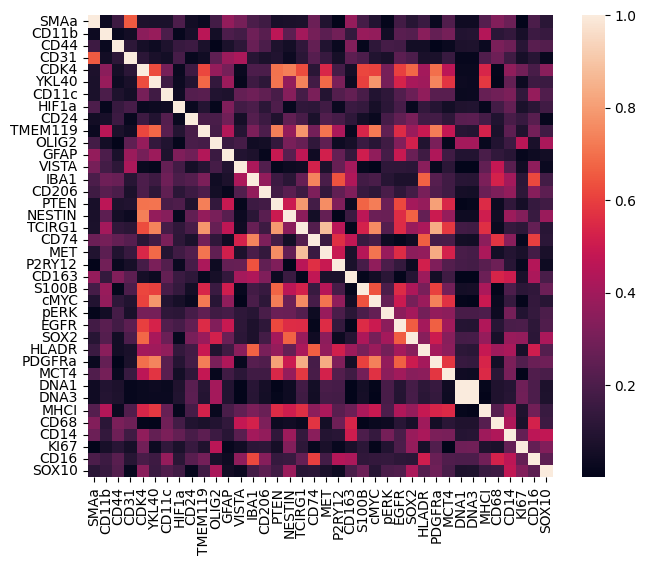

In [13]:
import seaborn as sns

df_training_proteins = df_training[protein_names]

plt.figure(figsize=(7.5, 6))

sns.heatmap(df_training_proteins.corr().abs(), xticklabels=1, yticklabels=1)

We can see some linear correlation between different proteins.

## Q2) Feature Extraction and Classical Regression

In [14]:

image_path = image_folder + 'B1_24x60.png'

I = rgba2rgb(imread(image_path)) #read sample RGBA image and convert to RGB
I_hed =  rgb2hed(I) #convert to HED

print(I.shape)
print(I_hed.shape)
print(df_training.shape[0])

(256, 256, 3)
(256, 256, 3)
7027


In [15]:


averages_variances_and_cd11b = np.empty((df_training.shape[0], 13))

for i in range(df_training.shape[0]):
  image_path = image_folder + df_training.iloc[i, :].name + '.png'

  if df_training.iloc[i, :]['specimen_id'] == 'B1':
    I = rgba2rgb(imread(image_path))
    I_hed =  rgb2hed(I)
  else:
    I = imread(image_path)
    I_hed =  rgb2hed(I)

  for j in range(0, 3):
    averages_variances_and_cd11b[i, j] = np.mean(I[:,:,j])

  for j in range(3, 6):
    averages_variances_and_cd11b[i, j] = np.var(I[:,:,j-3])

  for j in range(6, 9):
    averages_variances_and_cd11b[i, j] = np.mean(I_hed[:,:,j-6])

  for j in range(9, 12):
    averages_variances_and_cd11b[i, j] = np.var(I_hed[:,:,j-9])


  averages_variances_and_cd11b[i, 12] = df_training.iloc[i, :]['CD11b']




print(averages_variances_and_cd11b)

[[ 7.89486874e-01  5.28271843e-01  7.31651755e-01 ...  4.75286152e-04
   1.53946412e-04 -4.13649755e+00]
 [ 8.27528351e-01  6.30595248e-01  7.89530376e-01 ...  4.29174467e-04
   1.61341043e-04 -4.73160113e+00]
 [ 9.06469248e-01  9.01310580e-01  9.36297607e-01 ...  1.95847025e-05
   1.16048638e-05 -4.73160113e+00]
 ...
 [ 1.84515610e+02  1.32275436e+02  1.84965927e+02 ...  4.67441289e-04
   1.33817998e-04 -2.49875064e+00]
 [ 1.87973434e+02  1.37014587e+02  1.87839447e+02 ...  5.09063689e-04
   1.34330687e-04 -4.93474596e-01]
 [ 1.89872513e+02  1.39777649e+02  1.89988022e+02 ...  4.37410771e-04
   1.23882843e-04 -3.54202925e-01]]


i)ii) From our image data, we are only extracting the mean and variances of all six colour channels to use for classical regression. We first do ordinary least squares regression.

In [16]:
from sklearn.linear_model import LinearRegression

X_train = averages_variances_and_cd11b[:, 0:12]
y_train = averages_variances_and_cd11b[:, 12]


ols = LinearRegression().fit(X_train, y_train)

In [17]:
averages_variances_and_cd11b_test = np.empty((df_test.shape[0], 13))

for i in range(df_test.shape[0]):
  image_path = image_folder + df_test.iloc[i, :].name + '.png'

  I = rgba2rgb(imread(image_path))
  I_hed =  rgb2hed(I)

  for j in range(0, 3):
    averages_variances_and_cd11b_test[i, j] = np.mean(I[:,:,j])

  for j in range(3, 6):
    averages_variances_and_cd11b_test[i, j] = np.var(I[:,:,j-3])

  for j in range(6, 9):
    averages_variances_and_cd11b_test[i, j] = np.mean(I_hed[:,:,j-6])

  for j in range(9, 12):
    averages_variances_and_cd11b_test[i, j] = np.var(I_hed[:,:,j-9])


  averages_variances_and_cd11b_test[i, 12] = df_test.iloc[i, :]['CD11b']

print(averages_variances_and_cd11b_test)

[[ 8.48882698e-01  7.11311131e-01  8.23696600e-01 ...  4.47025877e-04
   1.93754659e-04 -1.44568638e+00]
 [ 7.92615464e-01  5.26604267e-01  7.18968231e-01 ...  4.44697700e-04
   1.91705229e-04 -1.19879763e+00]
 [ 7.82705808e-01  4.79398002e-01  6.96010455e-01 ...  3.52959514e-04
   1.26403844e-04 -1.63198678e+00]
 ...
 [ 7.72198845e-01  5.00646494e-01  7.08484545e-01 ...  6.60264163e-04
   1.96608556e-04 -1.75302656e+00]
 [ 7.67990950e-01  5.19306916e-01  7.17799048e-01 ...  7.15078639e-04
   1.89096684e-04 -2.52533340e+00]
 [ 7.66442572e-01  5.25807040e-01  7.18987977e-01 ...  8.75188837e-04
   2.29373670e-04 -2.95225998e+00]]


The rmse for ols is  1.551766639441885
The pearson correlation coefficient for ols is  0.4540747258545619
The spearman correlation coefficient for ols is  0.510601905077415
The r2 score for ols is  -0.16746424802452387


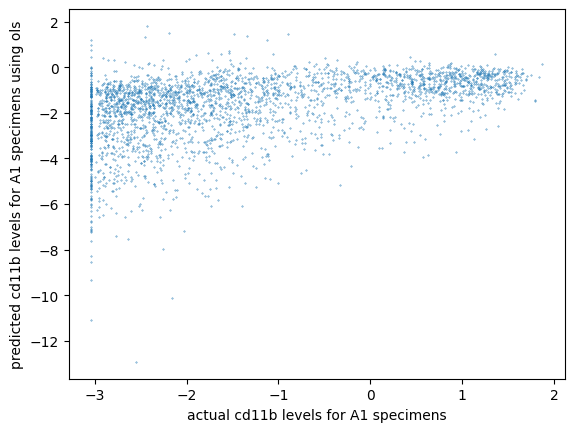

In [18]:
from sklearn.metrics import root_mean_squared_error, r2_score

X_test = averages_variances_and_cd11b_test[:, 0:12]
y_test = averages_variances_and_cd11b_test[:, 12]

y_pred = ols.predict(X_test)

pearson, _ = stats.pearsonr(y_test, y_pred)
spearman, _ = stats.spearmanr(y_test, y_pred)

print('The rmse for ols is ', root_mean_squared_error(y_test, y_pred))
print('The pearson correlation coefficient for ols is ', pearson)
print('The spearman correlation coefficient for ols is ', spearman)
print('The r2 score for ols is ', r2_score(y_test, y_pred))


plt.scatter(y_test, y_pred, s=0.1)

plt.ylabel('predicted cd11b levels for A1 specimens using ols')
plt.xlabel('actual cd11b levels for A1 specimens')

plt.show()

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

params_svr = {
    'kernel':['rbf', 'poly', 'sigmoid'],
    'C': np.logspace(-5, 15, num=100, base=2),
    'gamma': np.logspace(-15, 3, num=100, base=2),
    'degree': [2, 3, 4, 5, 6]
}

# setting up the randomized search objects
grid_svr  = RandomizedSearchCV(SVR(), params_svr, refit='r2', scoring = ['r2', 'neg_root_mean_squared_error'], cv=5, n_jobs=-1, n_iter=100)

In [22]:
import time
pd.set_option('display.max_colwidth', None)

start_time = time.time()
grid_svr.fit(X_train_scaled, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

pd.DataFrame(grid_svr.cv_results_)[['params', 'mean_test_r2','mean_test_neg_root_mean_squared_error', 'rank_test_r2']].sort_values('rank_test_r2')


--- 859.9271695613861 seconds ---


,params,mean_test_r2,mean_test_neg_root_mean_squared_error,rank_test_r2
5,"{'kernel': 'poly', 'gamma': 0.20693831997120285, 'degree': 6, 'C': 69.12382328910758}",1.369323e-01,-1.351837e+00,1
44,"{'kernel': 'rbf', 'gamma': 2.2686250443909275, 'degree': 3, 'C': 0.16773346094854716}",7.177726e-02,-1.388477e+00,2
55,"{'kernel': 'rbf', 'gamma': 0.027549726718625666, 'degree': 2, 'C': 17.040657431039392}",-1.993611e-02,-1.471697e+00,3
65,"{'kernel': 'rbf', 'gamma': 0.0009169247174430732, 'degree': 4, 'C': 988.7725963161691}",-4.681292e-02,-1.492451e+00,4
15,"{'kernel': 'poly', 'gamma': 0.23473272766542674, 'degree': 5, 'C': 0.03594712503031574}",-5.691614e-02,-1.492132e+00,5
...,...,...,...,...
96,"{'kernel': 'sigmoid', 'gamma': 7.052730039968179, 'degree': 2, 'C': 2635.0897111233157}",-3.353791e+08,-2.344190e+04,96
4,"{'kernel': 'sigmoid', 'gamma': 0.7297400528407237, 'degree': 2, 'C': 10688.993442873498}",-1.621216e+10,-1.794637e+05,97
48,"{'kernel': 'sigmoid', 'gamma': 8.0, 'degree': 3, 'C': 28486.28364956637}",-1.905000e+10,-1.766426e+05,98
95,"{'kernel': 'sigmoid', 'gamma': 4.260164357759848, 'degree': 2, 'C': 10688.993442873498}",-4.724345e+10,-2.996241e+05,99


The rmse for svr is  1.4008557368610046
The pearson correlation coefficient for svr is  0.27823183528848616
The spearman correlation coefficient for svr is  0.5367574714102349
The r2 score for svr is  0.04856835128024517


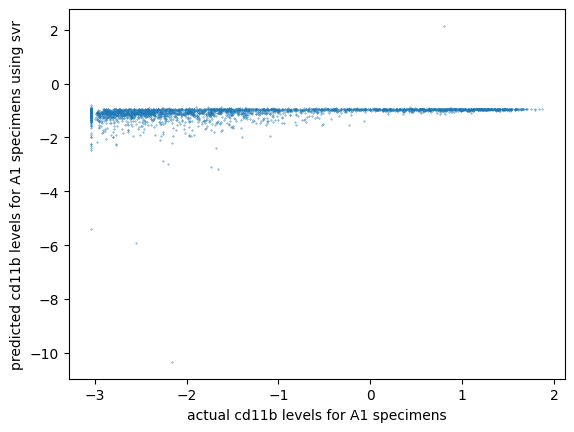

In [25]:
X_test_scaled = scaler.transform(X_test)

y_pred = grid_svr.predict(X_test_scaled)

pearson, _ = stats.pearsonr(y_test, y_pred)
spearman, _ = stats.spearmanr(y_test, y_pred)

print('The rmse for svr is ', root_mean_squared_error(y_test, y_pred))
print('The pearson correlation coefficient for svr is ', pearson)
print('The spearman correlation coefficient for svr is ', spearman)
print('The r2 score for svr is ', r2_score(y_test, y_pred))


plt.scatter(y_test, y_pred, s=0.1)

plt.ylabel('predicted cd11b levels for A1 specimens using svr')
plt.xlabel('actual cd11b levels for A1 specimens')

plt.show()